In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("kochi.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,PS,WS50M
0,2011,6,1,5,26.64,90.44,2.17,100.08,6.97
1,2011,6,1,6,26.94,89.69,1.76,100.13,7.05
2,2011,6,1,7,27.34,88.19,1.42,100.19,7.12
3,2011,6,1,8,27.80,86.31,1.33,100.26,7.59
4,2011,6,1,9,28.12,85.06,1.45,100.31,8.13
...,...,...,...,...,...,...,...,...,...
86203,2021,4,1,0,27.54,90.69,0.25,100.09,4.06
86204,2021,4,1,1,27.42,91.19,0.28,100.03,3.90
86205,2021,4,1,2,27.33,91.62,0.31,100.00,3.80
86206,2021,4,1,3,27.28,91.81,0.34,100.01,3.82


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS50M']


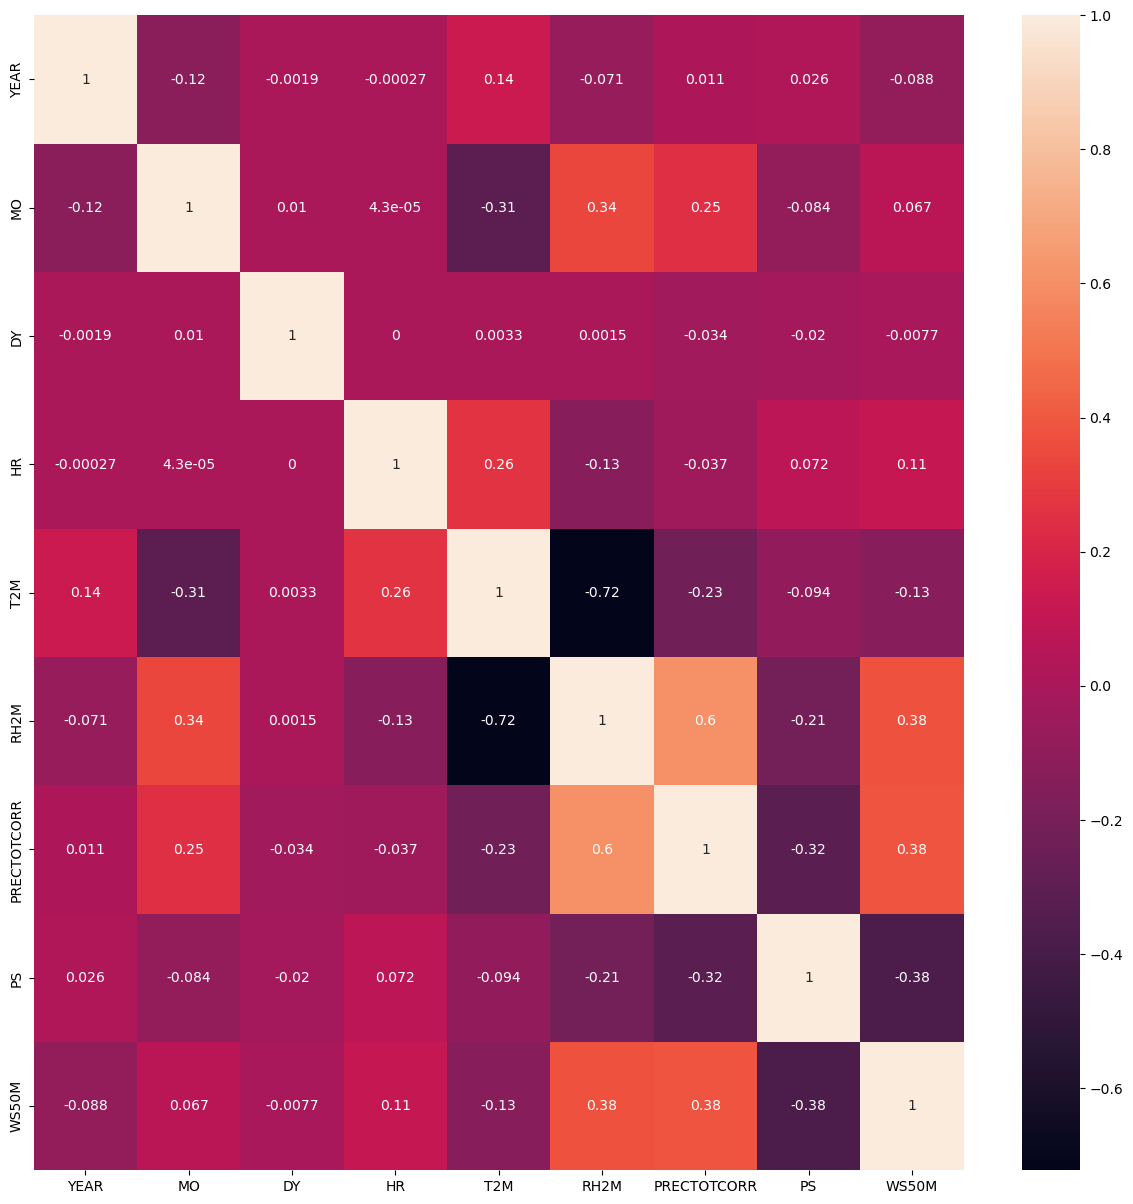

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

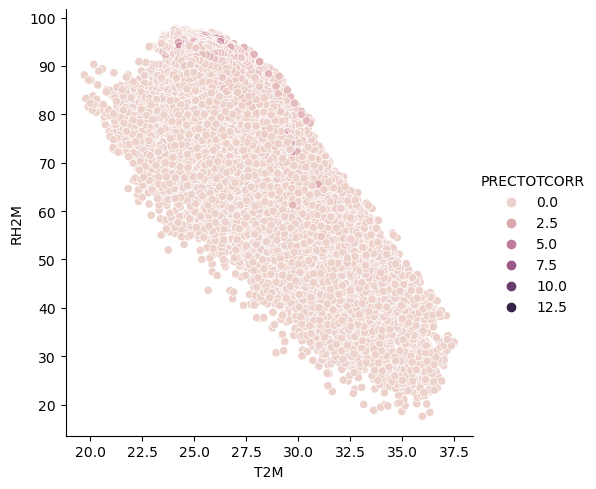

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


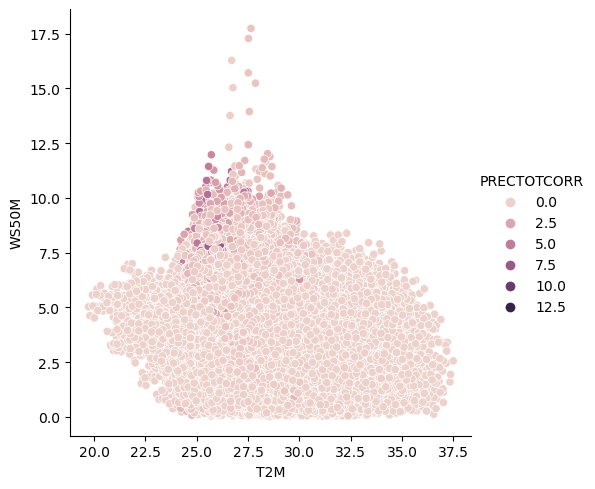

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


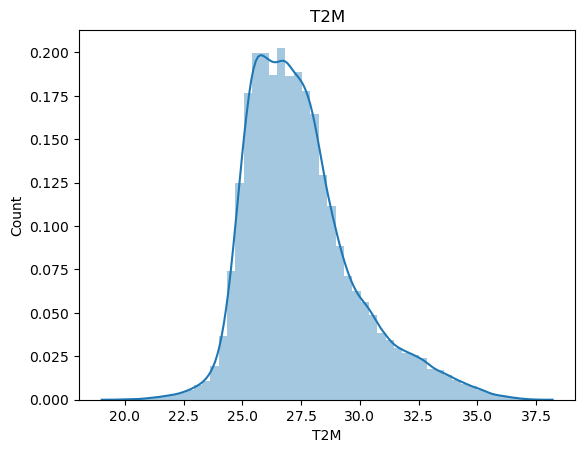

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


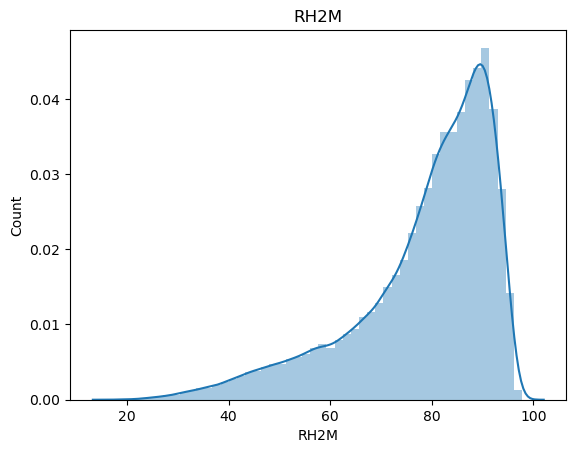

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


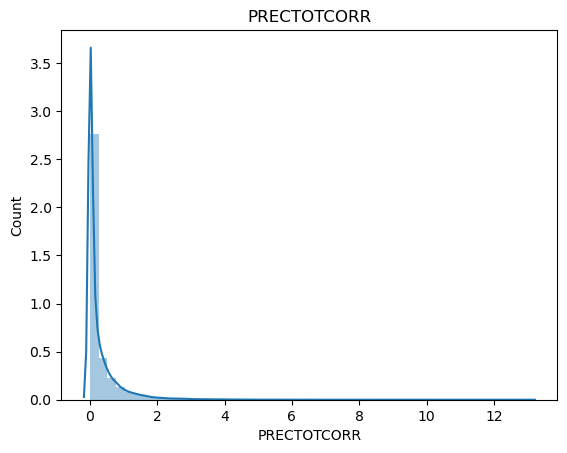

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


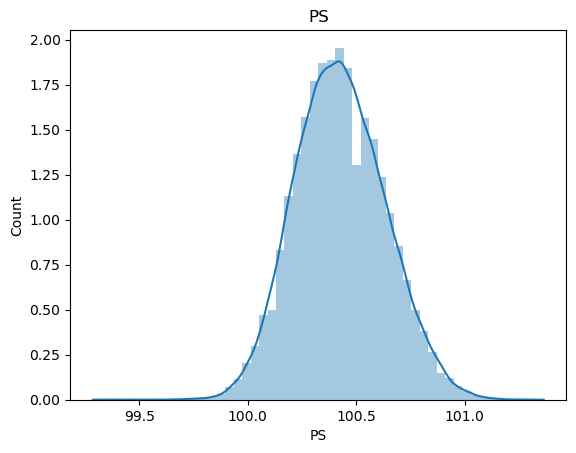

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


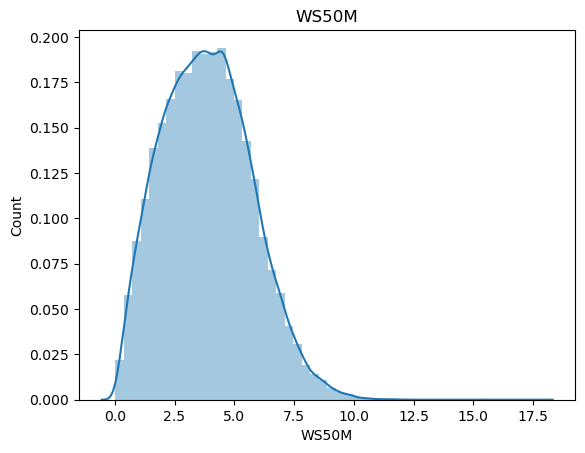

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

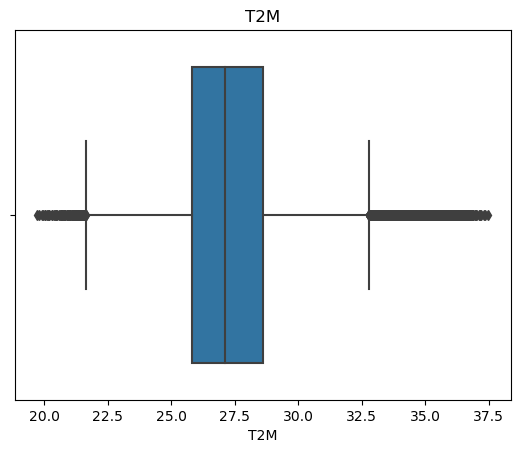

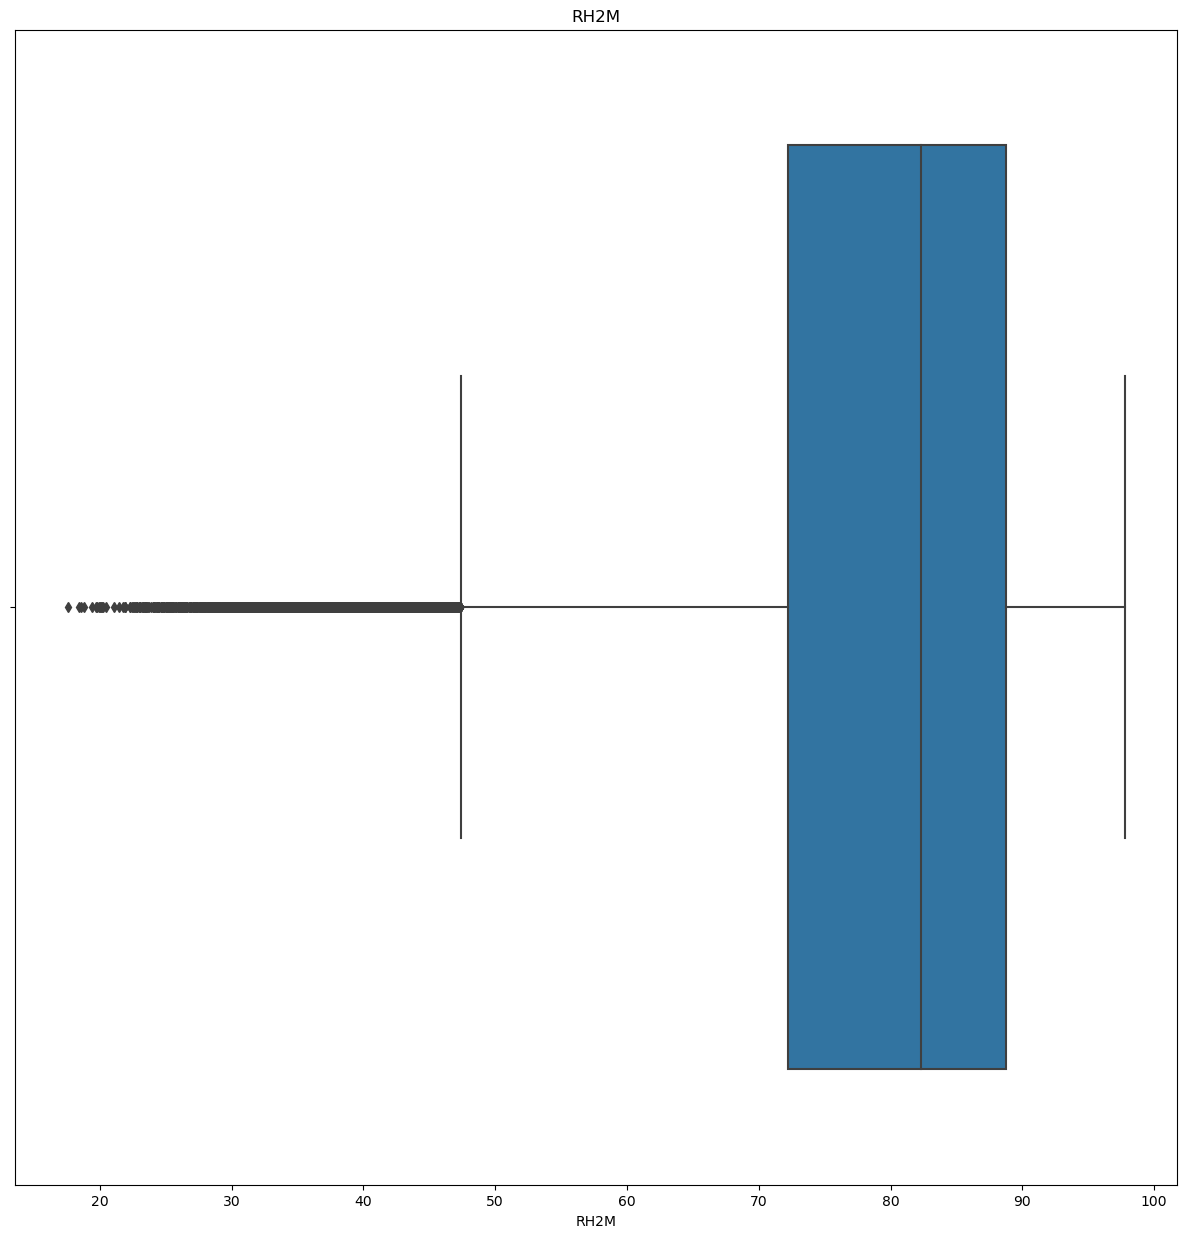

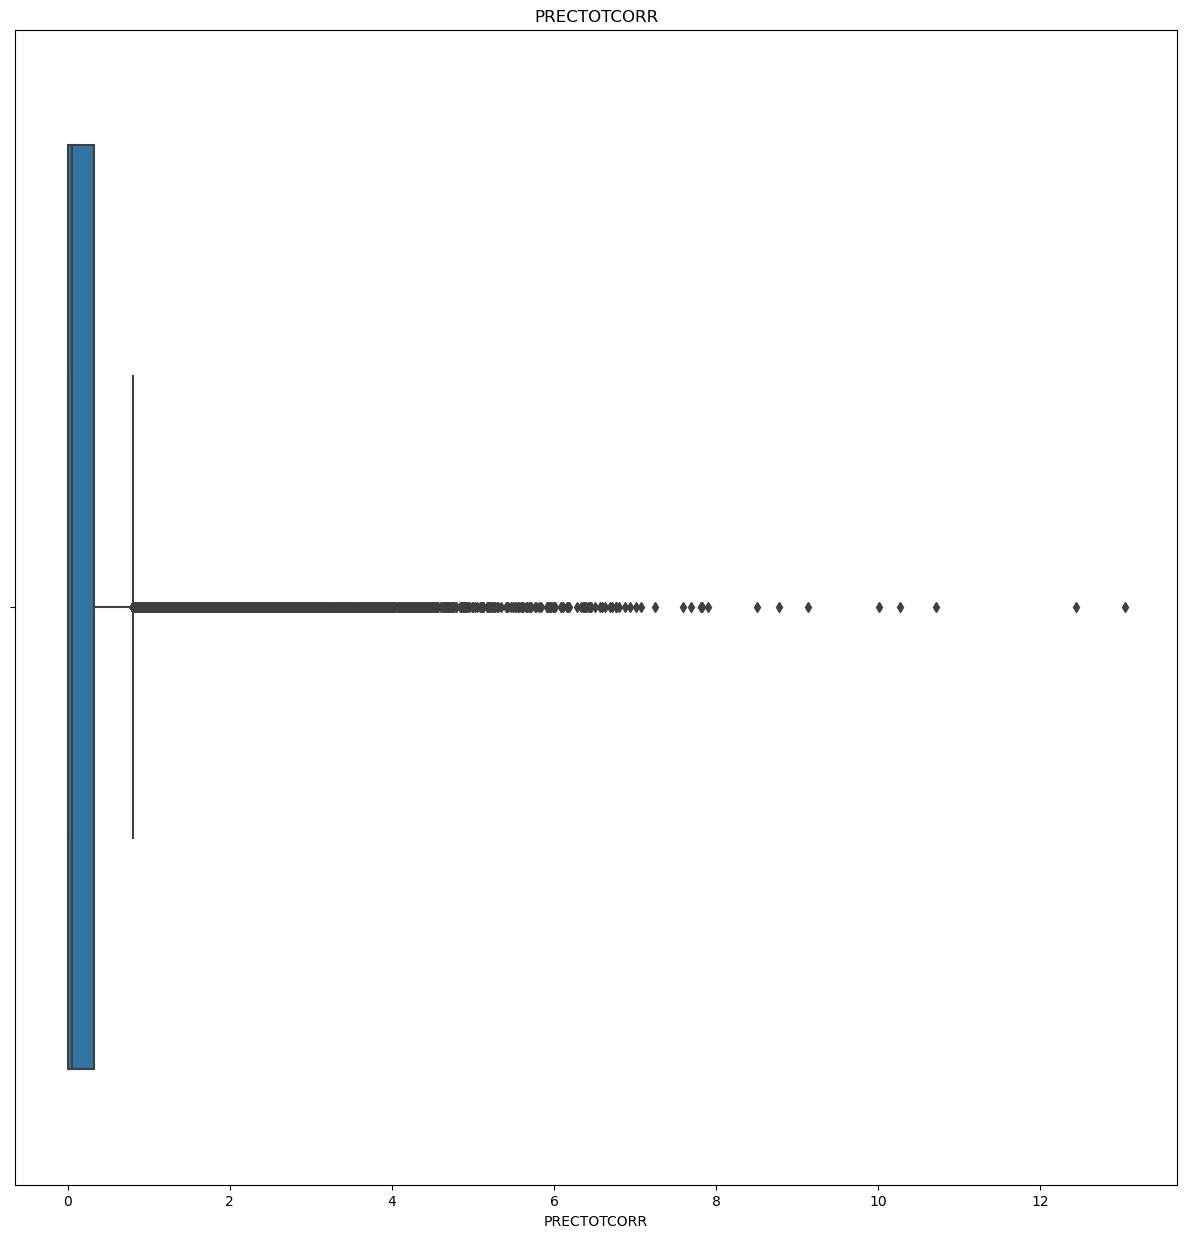

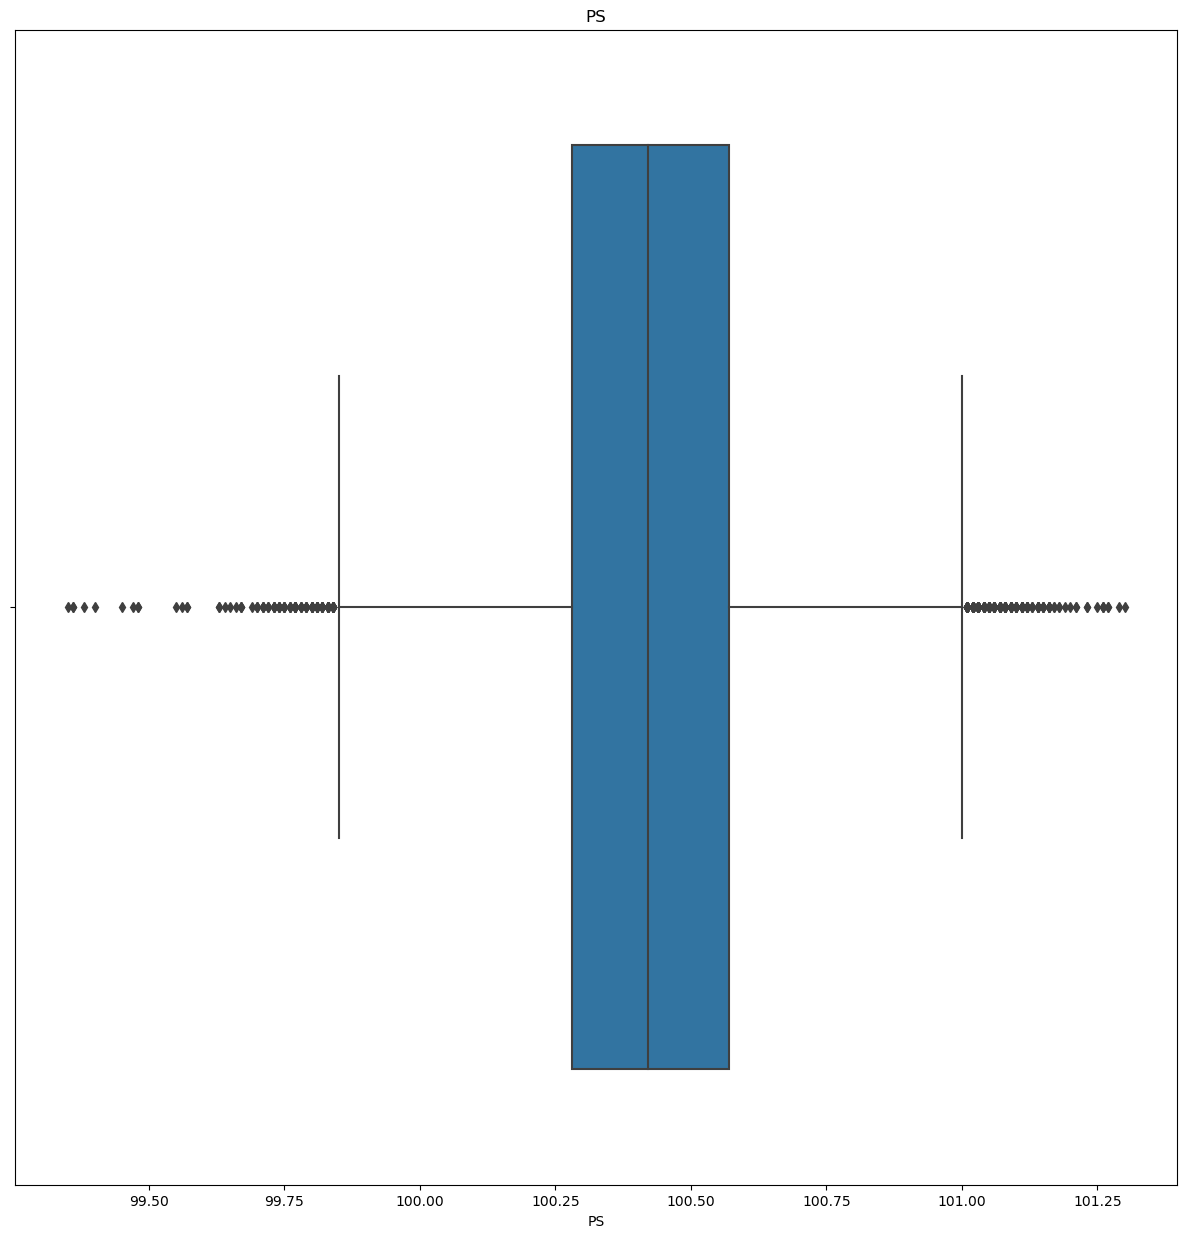

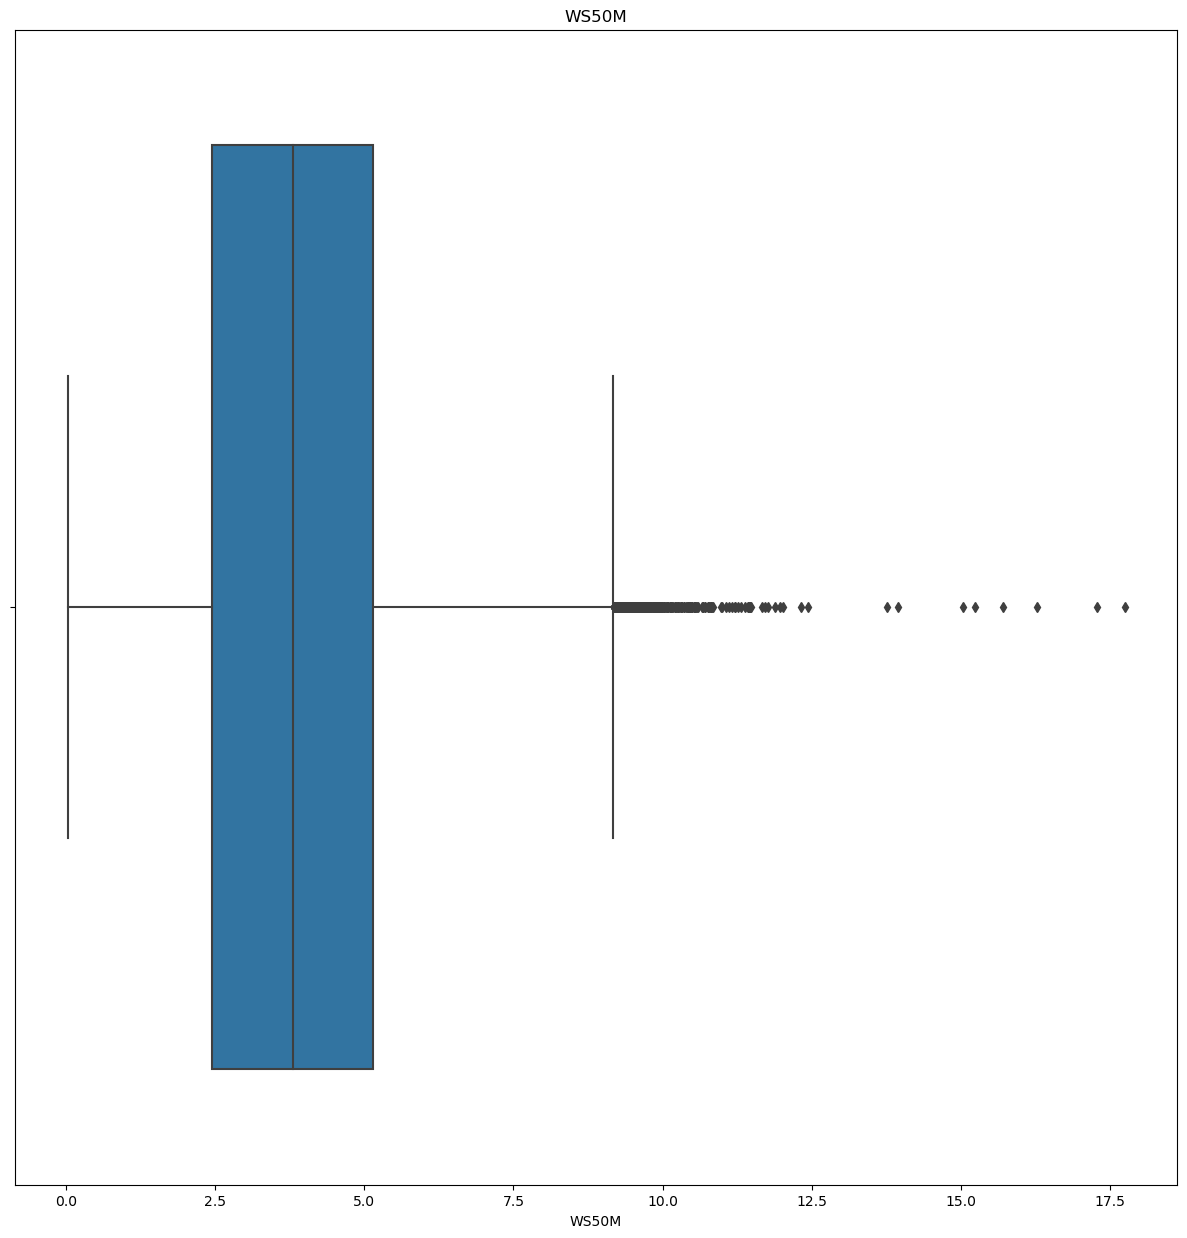

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[26.64 26.94 27.34 ... 20.64 35.68 35.16]
<class 'numpy.ndarray'>
[2.170e+00 1.760e+00 1.420e+00 1.330e+00 1.450e+00 1.710e+00 2.090e+00
 2.400e+00 2.580e+00 2.650e+00 3.190e+00 3.900e+00 4.600e+00 5.050e+00
 4.880e+00 4.200e+00 3.350e+00 2.930e+00 3.220e+00 3.940e+00 4.670e+00
 4.930e+00 4.840e+00 4.290e+00 4.100e+00 3.770e+00 3.450e+00 2.190e+00
 2.180e+00 2.080e+00 2.000e+00 1.640e+00 1.480e+00 1.390e+00 1.300e+00
 1.250e+00 1.230e+00 1.310e+00 1.520e+00 1.700e+00 1.850e+00 2.100e+00
 2.230e+00 1.990e+00 1.540e+00 1.290e+00 2.140e+00 2.460e+00 2.620e+00
 2.960e+00 2.820e+00 2.240e+00 2.040e+00 1.880e+00 1.790e+00 1.800e+00
 1.860e+00 1.830e+00 1.590e+00 1.670e+00 1.560e+00 1.160e+00 1.150e+00
 1.070e+00 8.900e-01 6.700e-01 5.100e-01 4.400e-01 4.900e-01 3.900e-01
 4.700e-01 6.500e-01 8.700e-01 1.020e+00 1.110e+00 1.360e+00 1.490e+00
 1.430e+00 1.400e+00 1.050e+00 8.000e-01 6.200e-01 4.800e-01 4.100e-01
 3.600e-01 3.400e-01 2.600e-01 2.100e-01 2.300e-01 5.000e-01 1.190e+00
 1.380e+00 

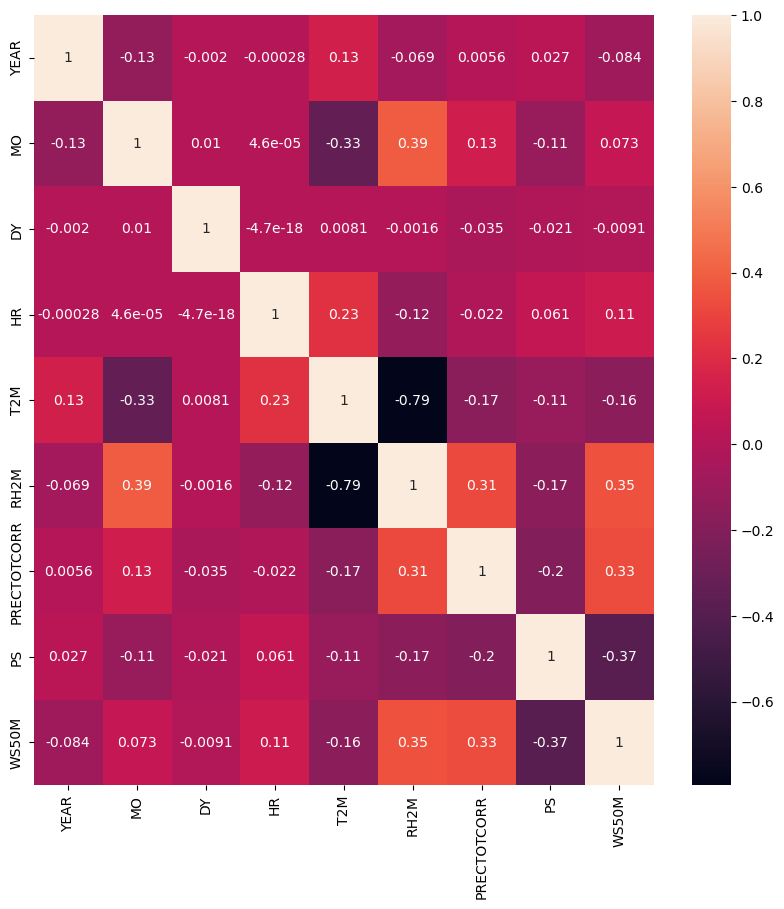

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


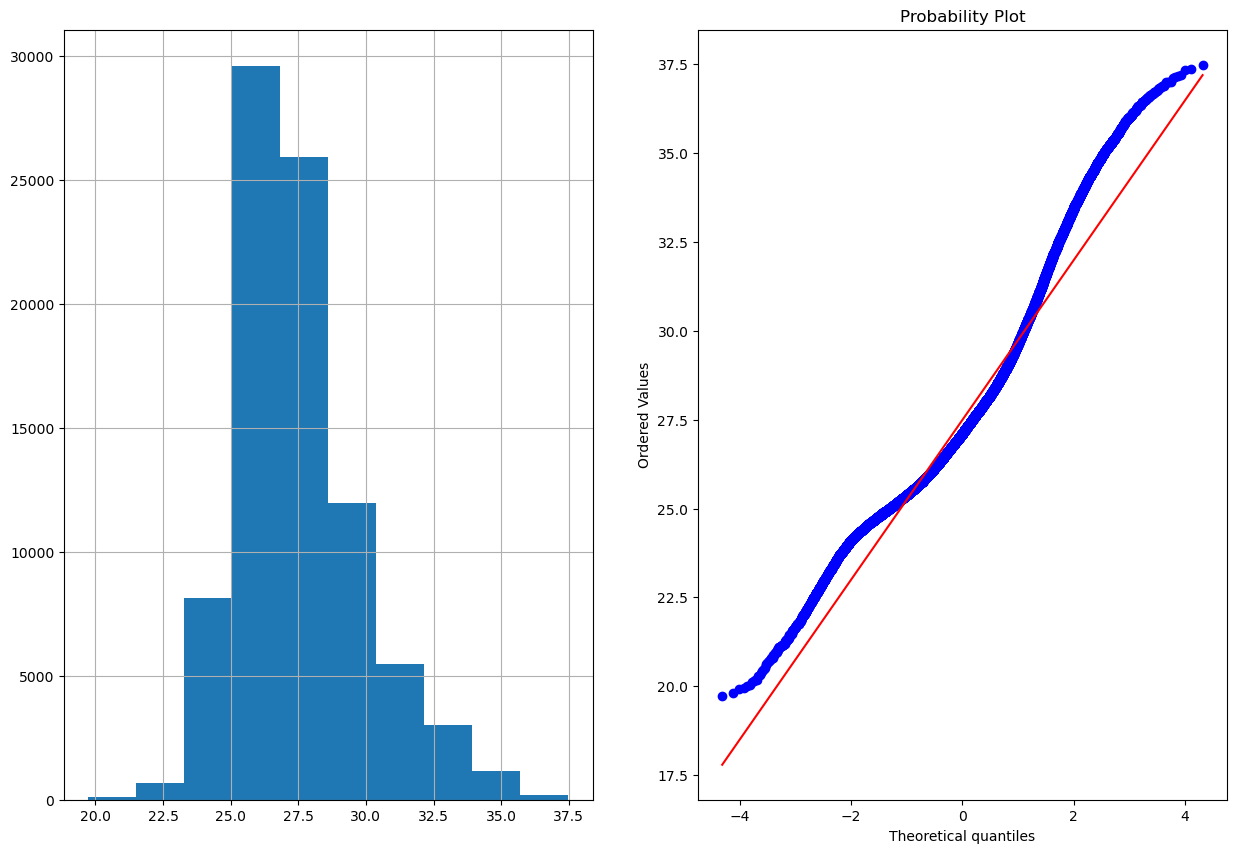

RH2M


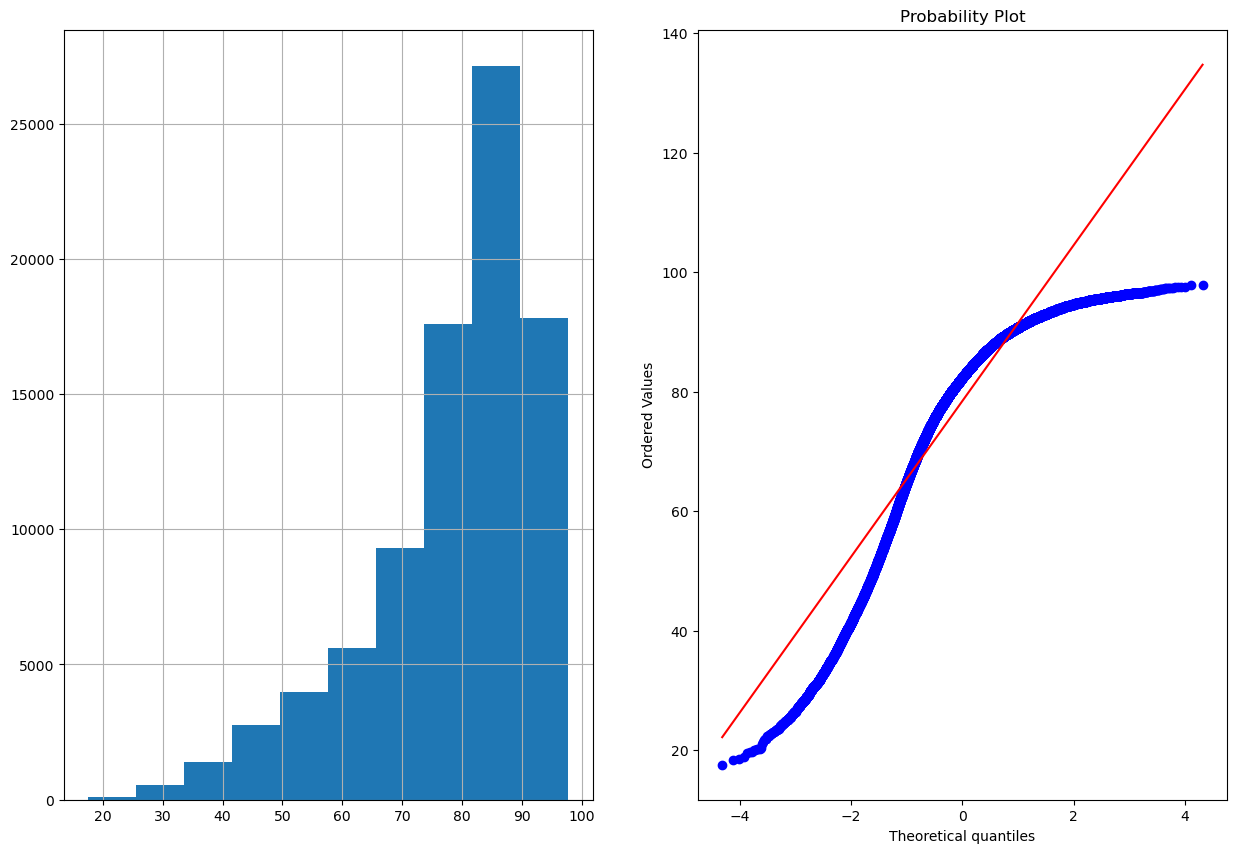

PRECTOTCORR


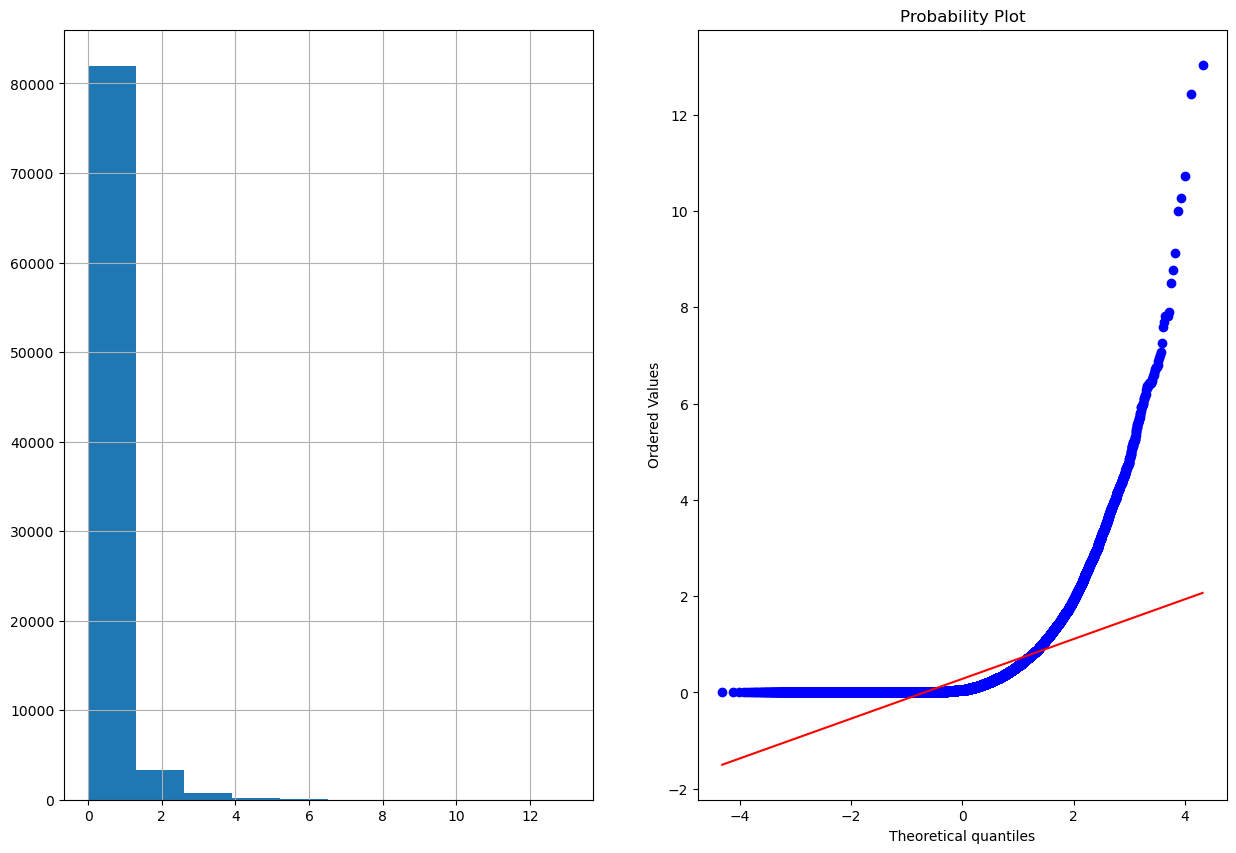

PS


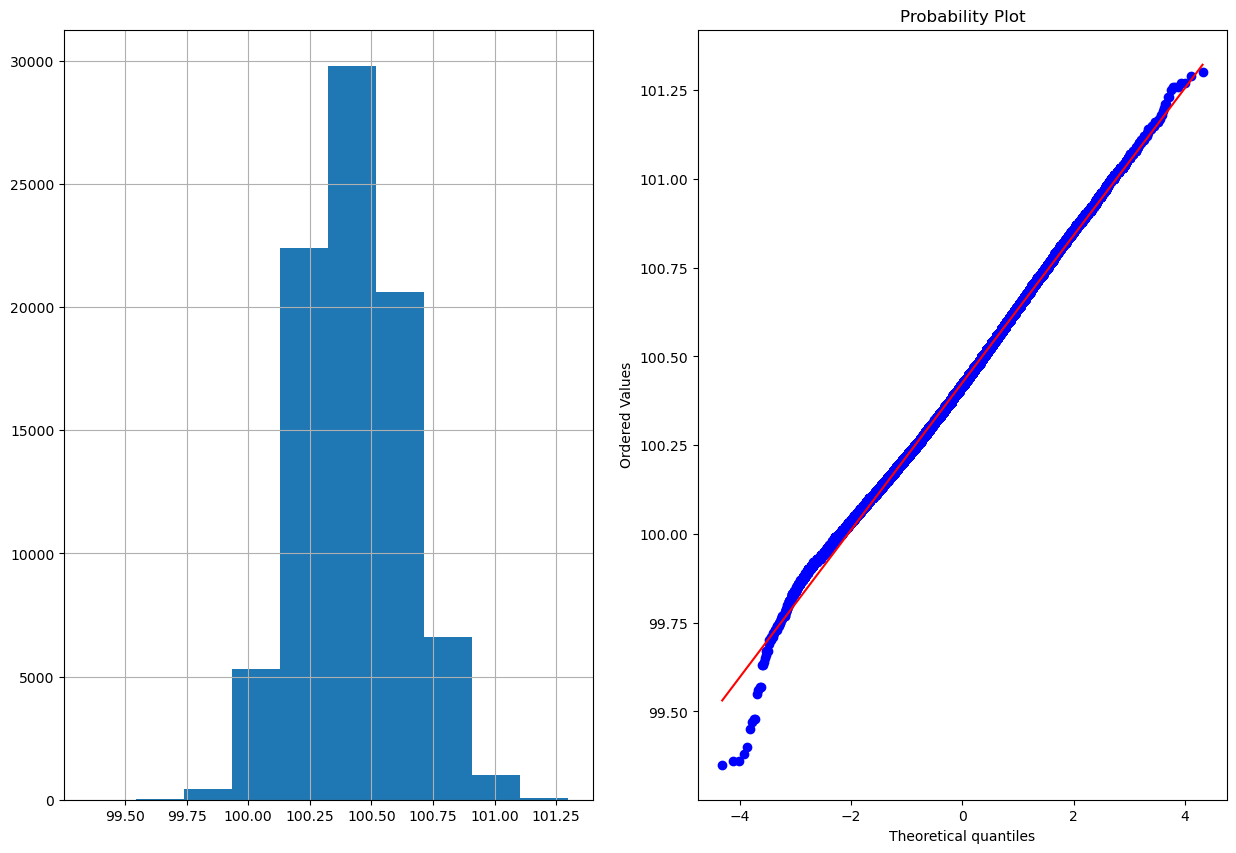

WS50M


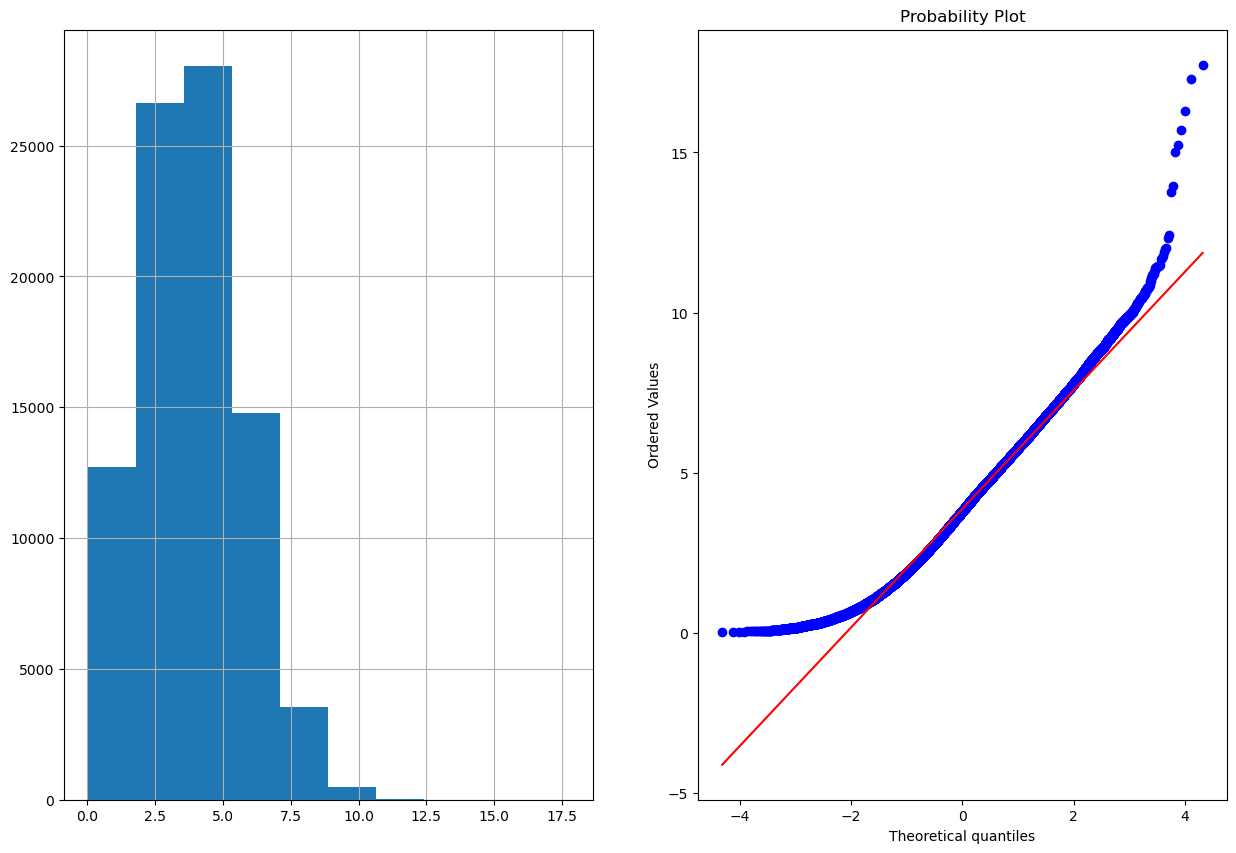

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([2.170e+00, 1.760e+00, 1.420e+00, 1.330e+00, 1.450e+00, 1.710e+00,
       2.090e+00, 2.400e+00, 2.580e+00, 2.650e+00, 3.190e+00, 3.900e+00,
       4.600e+00, 5.050e+00, 4.880e+00, 4.200e+00, 3.350e+00, 2.930e+00,
       3.220e+00, 3.940e+00, 4.670e+00, 4.930e+00, 4.840e+00, 4.290e+00,
       4.100e+00, 3.770e+00, 3.450e+00, 2.190e+00, 2.180e+00, 2.080e+00,
       2.000e+00, 1.640e+00, 1.480e+00, 1.390e+00, 1.300e+00, 1.250e+00,
       1.230e+00, 1.310e+00, 1.520e+00, 1.700e+00, 1.850e+00, 2.100e+00,
       2.230e+00, 1.990e+00, 1.540e+00, 1.290e+00, 2.140e+00, 2.460e+00,
       2.620e+00, 2.960e+00, 2.820e+00, 2.240e+00, 2.040e+00, 1.880e+00,
       1.790e+00, 1.800e+00, 1.860e+00, 1.830e+00, 1.590e+00, 1.670e+00,
       1.560e+00, 1.160e+00, 1.150e+00, 1.070e+00, 8.900e-01, 6.700e-01,
       5.100e-01, 4.400e-01, 4.900e-01, 3.900e-01, 4.700e-01, 6.500e-01,
       8.700e-01, 1.020e+00, 1.110e+00, 1.360e+00, 1.490e+00, 1.430e+00,
       1.400e+00, 1.050e+00, 8.000e-01, 6.200e-01, 

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([0., 1.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,26.64,0.0
1,26.94,0.0
2,27.34,0.0
3,27.80,0.0
4,28.12,0.0
...,...,...
86203,27.54,0.0
86204,27.42,0.0
86205,27.33,0.0
86206,27.28,0.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,26.64,0.0,5
1,26.94,0.0,6
2,27.34,0.0,7
3,27.80,0.0,8
4,28.12,0.0,9
...,...,...,...
86203,27.54,0.0,0
86204,27.42,0.0,1
86205,27.33,0.0,2
86206,27.28,0.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,26.64,0.0,5,1
1,26.94,0.0,6,1
2,27.34,0.0,7,1
3,27.80,0.0,8,1
4,28.12,0.0,9,1
...,...,...,...,...
86203,27.54,0.0,0,1
86204,27.42,0.0,1,1
86205,27.33,0.0,2,1
86206,27.28,0.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,26.64,0.0,5,1,6
1,26.94,0.0,6,1,6
2,27.34,0.0,7,1,6
3,27.80,0.0,8,1,6
4,28.12,0.0,9,1,6
...,...,...,...,...,...
86203,27.54,0.0,0,1,4
86204,27.42,0.0,1,1,4
86205,27.33,0.0,2,1,4
86206,27.28,0.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,26.64,0.0,5,1,6,2011
1,26.94,0.0,6,1,6,2011
2,27.34,0.0,7,1,6,2011
3,27.80,0.0,8,1,6,2011
4,28.12,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,27.54,0.0,0,1,4,2021
86204,27.42,0.0,1,1,4,2021
86205,27.33,0.0,2,1,4,2021
86206,27.28,0.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,26.64,0.0,5,1,6,2011
1,26.94,0.0,6,1,6,2011
2,27.34,0.0,7,1,6,2011
3,27.80,0.0,8,1,6,2011
4,28.12,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,27.54,0.0,0,1,4,2021
86204,27.42,0.0,1,1,4,2021
86205,27.33,0.0,2,1,4,2021
86206,27.28,0.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([0., 1.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,26.64,0.0,5,1,6,2011,90.44
1,26.94,0.0,6,1,6,2011,89.69
2,27.34,0.0,7,1,6,2011,88.19
3,27.80,0.0,8,1,6,2011,86.31
4,28.12,0.0,9,1,6,2011,85.06
...,...,...,...,...,...,...,...
86203,27.54,0.0,0,1,4,2021,90.69
86204,27.42,0.0,1,1,4,2021,91.19
86205,27.33,0.0,2,1,4,2021,91.62
86206,27.28,0.0,3,1,4,2021,91.81


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,26.64,0.0,5,1,6,2011,90.44,6.97
1,26.94,0.0,6,1,6,2011,89.69,7.05
2,27.34,0.0,7,1,6,2011,88.19,7.12
3,27.80,0.0,8,1,6,2011,86.31,7.59
4,28.12,0.0,9,1,6,2011,85.06,8.13
...,...,...,...,...,...,...,...,...
86203,27.54,0.0,0,1,4,2021,90.69,4.06
86204,27.42,0.0,1,1,4,2021,91.19,3.90
86205,27.33,0.0,2,1,4,2021,91.62,3.80
86206,27.28,0.0,3,1,4,2021,91.81,3.82


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,26.64,0.0,5,1,6,2011,90.44,6.97,6.97
1,26.94,0.0,6,1,6,2011,89.69,7.05,7.05
2,27.34,0.0,7,1,6,2011,88.19,7.12,7.12
3,27.80,0.0,8,1,6,2011,86.31,7.59,7.59
4,28.12,0.0,9,1,6,2011,85.06,8.13,8.13
...,...,...,...,...,...,...,...,...,...
86203,27.54,0.0,0,1,4,2021,90.69,4.06,4.06
86204,27.42,0.0,1,1,4,2021,91.19,3.90,3.90
86205,27.33,0.0,2,1,4,2021,91.62,3.80,3.80
86206,27.28,0.0,3,1,4,2021,91.81,3.82,3.82


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

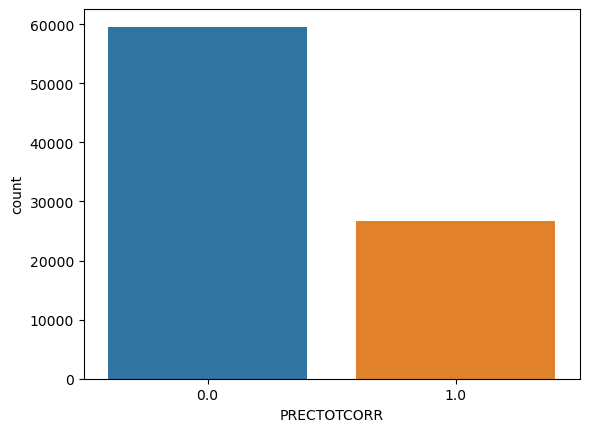

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("kochi-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,26.64,0.0,5,1,6,2011,90.44,6.97,6.97
1,26.94,0.0,6,1,6,2011,89.69,7.05,7.05
2,27.34,0.0,7,1,6,2011,88.19,7.12,7.12
3,27.80,0.0,8,1,6,2011,86.31,7.59,7.59
4,28.12,0.0,9,1,6,2011,85.06,8.13,8.13
...,...,...,...,...,...,...,...,...,...
86203,27.54,0.0,0,1,4,2021,90.69,4.06,4.06
86204,27.42,0.0,1,1,4,2021,91.19,3.90,3.90
86205,27.33,0.0,2,1,4,2021,91.62,3.80,3.80
86206,27.28,0.0,3,1,4,2021,91.81,3.82,3.82
